In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Passenger.csv', header='infer')

In [ ]:
df.head()

,Timestamp,Source,Speed,Course,Latitude,Longitude
0,2024-04-27 08:30:41,Terr-AIS,7.5,199.0,1.296622,103.7567
1,2024-04-27 08:26:47,Terr-AIS,7.6,163.0,1.304510,103.7545
2,2024-04-27 08:23:42,Terr-AIS,8.4,341.0,1.302993,103.7551
3,2024-04-27 08:21:42,Terr-AIS,8.5,345.0,1.298658,103.7570
4,2024-04-27 08:18:41,Terr-AIS,8.8,79.0,1.294713,103.7520


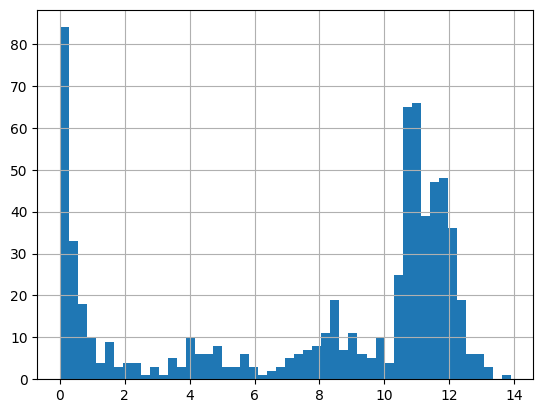

In [ ]:
df_hist = df.Speed.hist(bins=50)

In [ ]:
bin_width = 1
st = 0
en = 15

In [ ]:
speed_bins = np.arange(st,en+bin_width,bin_width)
speed_bins

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
speed_midpts = np.arange(st+bin_width/2,en,bin_width)
speed_midpts

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5])

In [ ]:
counts, bins = np.histogram(df['Speed'], bins=speed_bins,range=(st,en))
counts

array([11, 47, 40,  0, 12, 19,  5,  0,  1,  2,  5,  4,  0,  5,  0,  3,  5,
        0,  2,  0,  1,  0,  3,  4,  0,  0,  1,  0,  1,  0,  2,  0,  1,  1,
        0,  3,  1,  3,  3,  0,  7,  0,  1,  3,  2,  5,  0,  4,  0,  1,  5,
        0,  3,  0,  1,  3,  0,  4,  0,  1,  2,  0,  1,  0,  0,  2,  0,  2,
        0,  1,  3,  0,  4,  0,  1,  5,  0,  8,  0,  2,  3,  9,  0,  2,  6,
        6,  9,  0,  5,  2,  3,  9,  0,  0,  3,  3,  2,  0,  3,  2,  7,  2,
        0,  4, 10, 28, 20,  0, 28, 24, 42, 19,  0, 20, 21, 26, 18,  0, 16,
       14, 24, 12,  0,  8,  8,  6,  3,  0,  1,  2,  4,  1,  0,  1,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
bins

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

<BarContainer object of 150 artists>

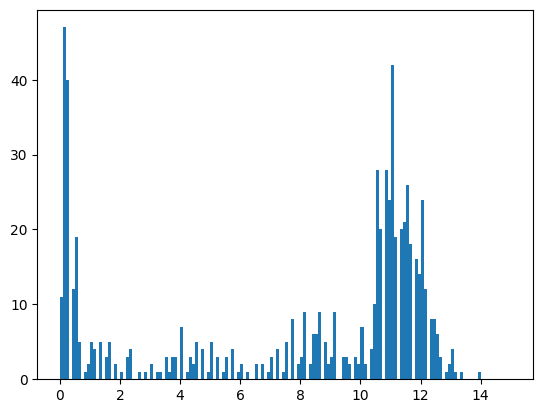

In [ ]:
plt.bar(speed_midpts, counts, width = bin_width)

In [ ]:
from pylab import *
from scipy.optimize import curve_fit

In [ ]:
def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

def trimodal(x,mu1,sigma1,A1,mu2,sigma2,A2,mu3,sigma3,A3):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)+gauss(x,mu3,sigma3,A3)

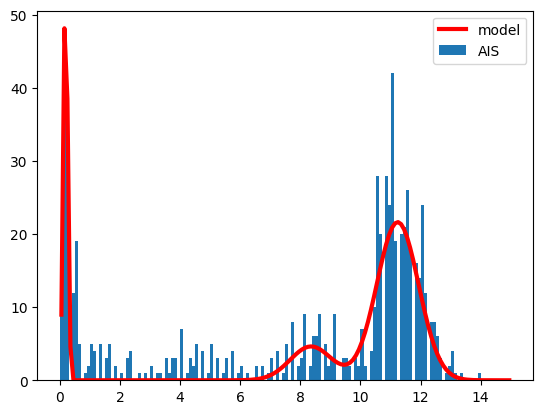

In [ ]:
#BI-MODAL
#expected=(0.3, 2, 100, 12, 5, 50)
#params,cov=curve_fit(bimodal,speed_midpts,counts,expected, maxfev=5000000, bounds=(0,[10, 5, 200, 20, 20, 200]) )
#plt.plot(speed_midpts, bimodal(speed_midpts,*params),color='red',lw=3,label='model')

#TRI-MODAL
expected=(0.3, 1, 100, 9, 0.5, 10, 12, 2, 50)
params,cov=curve_fit(trimodal,speed_midpts,counts,expected, maxfev=5000000, bounds=(0,[1, 5, 200, 10, 1, 20, 20, 20, 200 ]))
plt.plot(speed_midpts,trimodal(speed_midpts,*params),color='red',lw=3,label='model')

plt.bar(speed_midpts,counts,width=1*bin_width,label='AIS')
legend()

In [ ]:
sigma=sqrt(diag(cov))
print('mu1,sigma1,A1,mu2,sigma2,A2,mu3,sigma3,A3\n',params,'\n',sigma)

mu1,sigma1,A1,mu2,sigma2,A2,mu3,sigma3,A3
 [ 0.18825799  0.07249146 55.34639142  8.3529979   0.69236987  4.62667886
 11.23719391  0.69565617 21.64143845] 
 [0.00784965 0.00965835 5.92807218 0.30498969 0.31747093 1.7344031
 0.06534985 0.06804437 1.73051622]
